In [524]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor



In [525]:
# Read in CSV file
perth_houses_df = pd.read_csv("Resources/all_perth_310121.csv")

# Review the DataFrame
perth_houses_df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859553,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


### Data PreProcessing and Cleaning

In [526]:
# Check the statistics of each column
perth_houses_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,33656.0,637072.005794,355825.632737,51000.000000,410000.000000,535500.000000,760000.000000,2.440000e+06
BEDROOMS,33656.0,3.659110,0.752038,1.000000,3.000000,4.000000,4.000000,1.000000e+01
BATHROOMS,33656.0,1.823063,0.587427,1.000000,1.000000,2.000000,2.000000,1.600000e+01
GARAGE,31178.0,2.199917,1.365225,1.000000,2.000000,2.000000,2.000000,9.900000e+01
LAND_AREA,33656.0,2740.644016,16693.513215,61.000000,503.000000,682.000000,838.000000,9.999990e+05
FLOOR_AREA,33656.0,183.501545,72.102982,1.000000,130.000000,172.000000,222.250000,8.700000e+02
BUILD_YEAR,30501.0,1989.706436,20.964330,1868.000000,1978.000000,1995.000000,2005.000000,2.017000e+03
CBD_DIST,33656.0,19777.374465,11364.415413,681.000000,11200.000000,17500.000000,26600.000000,5.980000e+04
NEAREST_STN_DIST,33656.0,4523.371494,4495.064024,46.000000,1800.000000,3200.000000,5300.000000,3.550000e+04
POSTCODE,33656.0,6089.420074,62.167921,6003.000000,6050.000000,6069.000000,6150.000000,6.558000e+03


In [527]:
# Find the datatypes
perth_houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

In [528]:
# Find null values of any of the columns
perth_houses_df.isnull().sum()

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

In [529]:
# Change GARAGE 'NULL' to figure of 0 (assume there are no garages for these houses) 
perth_houses_df['GARAGE'] = perth_houses_df['GARAGE'].fillna(0)

# Set "BUILD_YEAR" to the median 
perth_houses_df['BUILD_YEAR'] = perth_houses_df['BUILD_YEAR'].fillna(perth_houses_df['BUILD_YEAR'].median())
perth_houses_df.tail(5)

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
33651,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013.0,16100,Fremantle Station,1500,03-2016\r,6162,-32.064580,115.751820,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0
33652,9C Pycombe Way,Westminster,410000,3,2,2.0,228,114,1995.0,9600,Stirling Station,4600,02-2017\r,6061,-31.867055,115.841403,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.679644,35.0
33653,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,1995.0,9600,Stirling Station,4600,02-2017\r,6061,-31.866890,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0
33654,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.0,12600,Warwick Station,4400,10-2016\r,6064,-31.839680,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,NaN
33655,9E Margaret Street,Midland,295000,3,1,2.0,296,95,1995.0,16700,Midland Station,1700,05-2016\r,6056,-31.882163,116.014755,LA SALLE COLLEGE,1.055564,53.0


In [530]:
# Change "BUILD_YEAR" columns from float to integer
perth_houses_df['BUILD_YEAR'] = perth_houses_df['BUILD_YEAR'].astype(int)
perth_houses_df.tail()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
33651,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013,16100,Fremantle Station,1500,03-2016\r,6162,-32.064580,115.751820,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0
33652,9C Pycombe Way,Westminster,410000,3,2,2.0,228,114,1995,9600,Stirling Station,4600,02-2017\r,6061,-31.867055,115.841403,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.679644,35.0
33653,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,1995,9600,Stirling Station,4600,02-2017\r,6061,-31.866890,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0
33654,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974,12600,Warwick Station,4400,10-2016\r,6064,-31.839680,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,NaN
33655,9E Margaret Street,Midland,295000,3,1,2.0,296,95,1995,16700,Midland Station,1700,05-2016\r,6056,-31.882163,116.014755,LA SALLE COLLEGE,1.055564,53.0


In [531]:
# Check breakdown of number of garages per house
perth_houses_df["GARAGE"].value_counts()

2.0     20724
1.0      5290
0.0      2478
3.0      2042
4.0      1949
6.0       466
5.0       362
8.0       129
7.0        97
12.0       30
10.0       26
9.0        17
14.0       13
13.0        8
11.0        7
16.0        4
20.0        3
18.0        3
32.0        1
26.0        1
50.0        1
21.0        1
31.0        1
17.0        1
22.0        1
99.0        1
Name: GARAGE, dtype: int64

In [532]:
# Replace values greater than 9 in the GARAGE column with the median value
threshold= 9
median_value=  (perth_houses_df['GARAGE'].median())

perth_houses_df.loc[perth_houses_df['GARAGE'] > threshold, 'GARAGE'] = median_value

# Change "GARAGE" column from float to integer
perth_houses_df['GARAGE'] = perth_houses_df['GARAGE'].astype(int)

# print the updated GARAGE values
perth_houses_df['GARAGE'].value_counts()

2    20826
1     5290
0     2478
3     2042
4     1949
6      466
5      362
8      129
7       97
9       17
Name: GARAGE, dtype: int64

In [533]:
# Check breakdown of number of bedrooms per house
perth_houses_df["BEDROOMS"].value_counts()

4     17635
3     11617
5      2476
2      1457
6       296
1        95
7        53
8        21
9         4
10        2
Name: BEDROOMS, dtype: int64

In [534]:
# Replace values greater than 8 in the "BEDROOMS" column with the median value
bed_threshold= 8
bed_median_value=  (perth_houses_df['BEDROOMS'].median())

perth_houses_df.loc[perth_houses_df['BEDROOMS'] > bed_threshold, 'BEDROOMS'] = bed_median_value

# Change "BEDROOMS" column from float to integer
perth_houses_df['BEDROOMS'] = perth_houses_df['BEDROOMS'].astype(int)

# print the updated "BEDROOMS" values
perth_houses_df['BEDROOMS'].value_counts()

4    17641
3    11617
5     2476
2     1457
6      296
1       95
7       53
8       21
Name: BEDROOMS, dtype: int64

In [535]:
# Check breakdown of number of "bathrooms" per house
perth_houses_df["BATHROOMS"].value_counts()

2     22264
1      8839
3      2284
4       229
5        30
6         7
7         2
16        1
Name: BATHROOMS, dtype: int64

In [536]:
# Replace values greater than 5 in the BATHROOMS column with the median value
bath_threshold= 5
bath_median_value=  (perth_houses_df['BATHROOMS'].median())

perth_houses_df.loc[perth_houses_df['BATHROOMS'] > bath_threshold, 'BATHROOMS'] = bath_median_value

# Change "BATHROOMS" column from float to integer
perth_houses_df['BATHROOMS'] = perth_houses_df['BATHROOMS'].astype(int)

# print the updated "BATHROOMS" values
perth_houses_df['BATHROOMS'].value_counts()

2    22274
1     8839
3     2284
4      229
5       30
Name: BATHROOMS, dtype: int64

In [537]:
# Check breakdown of "floor_area" per house
perth_houses_df["FLOOR_AREA"].value_counts()

200    401
150    362
160    337
130    333
180    326
      ... 
468      1
455      1
519      1
627      1
607      1
Name: FLOOR_AREA, Length: 528, dtype: int64

In [538]:
# Replace values less than 51 in the "FLOOR_AREA" column with the 25 Percentile value
floor_area_threshold= 51
floor_area_percentile_value=  (perth_houses_df['FLOOR_AREA'].quantile(0.25))

perth_houses_df.loc[perth_houses_df['FLOOR_AREA'] < floor_area_threshold, 'FLOOR_AREA'] = floor_area_percentile_value

# Change "BATHROOMS" column from float to integer
perth_houses_df['FLOOR_AREA'] = perth_houses_df['FLOOR_AREA'].astype(int)

# print the updated "BATHROOMS" values
perth_houses_df['FLOOR_AREA'].value_counts()

200    401
150    362
130    360
160    337
180    326
      ... 
493      1
525      1
462      1
558      1
751      1
Name: FLOOR_AREA, Length: 507, dtype: int64

In [539]:
# Check breakdown of "land_area" per house
#perth_houses_df["LAND_AREA"].value_counts()

In [540]:
# Replace values greater than 500000 in the "LAND_AREA" column with the median value
#land_area_threshold= 500000
#land_area_median_value=  (perth_houses_df['LAND_AREA'].median())

#perth_houses_df.loc[perth_houses_df['LAND_AREA'] > land_area_threshold, 'LAND_AREA'] = land_area_median_value

# Change "LAND_AREA" column from float to integer
#perth_houses_df['LAND_AREA'] = perth_houses_df['LAND_AREA'].astype(int)

# print the updated "LAND_AREA" values
#perth_houses_df['LAND_AREA'].value_counts()

In [541]:
# Set "DATE_SOLD" to datetime
perth_houses_df['DATE_SOLD'] = pd.to_datetime(perth_houses_df['DATE_SOLD'], format='%m-%Y\r')

# Split "DATE_SOLD" into "MONTH" and "DATE" columna
perth_houses_df['MONTH_SOLD'] = perth_houses_df['DATE_SOLD'].dt.month
perth_houses_df['YEAR_SOLD'] = perth_houses_df['DATE_SOLD'].dt.year
perth_houses_df.head()


,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,...,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK,MONTH_SOLD,YEAR_SOLD
0,1 Acorn Place,South Lake,565000,4,2,2,600,160,2003,18300,...,1800,2018-09-01,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN,9,2018
1,1 Addis Way,Wandi,365000,3,2,2,351,139,2013,26900,...,4900,2019-02-01,6167,-32.193470,115.859553,ATWELL COLLEGE,5.524324,129.0,2,2019
2,1 Ainsley Court,Camillo,287000,3,1,1,719,86,1979,22600,...,1900,2015-06-01,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0,6,2015
3,1 Albert Street,Bellevue,255000,2,1,2,651,59,1953,17900,...,3600,2018-07-01,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN,7,2018
4,1 Aman Place,Lockridge,325000,4,1,2,466,131,1998,11200,...,2000,2016-11-01,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN,11,2016


In [542]:
# Drop columns not required for ML 
perth_houses_cleaned_df = perth_houses_df.drop(['ADDRESS','CBD_DIST','NEAREST_STN_DIST','POSTCODE','DATE_SOLD','LATITUDE','LONGITUDE','NEAREST_SCH_RANK'], axis=1)
perth_houses_cleaned_df.head()

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,NEAREST_STN,NEAREST_SCH,NEAREST_SCH_DIST,MONTH_SOLD,YEAR_SOLD
0,South Lake,565000,4,2,2,600,160,2003,Cockburn Central Station,LAKELAND SENIOR HIGH SCHOOL,0.828339,9,2018
1,Wandi,365000,3,2,2,351,139,2013,Kwinana Station,ATWELL COLLEGE,5.524324,2,2019
2,Camillo,287000,3,1,1,719,86,1979,Challis Station,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,6,2015
3,Bellevue,255000,2,1,2,651,59,1953,Midland Station,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,7,2018
4,Lockridge,325000,4,1,2,466,131,1998,Bassendean Station,KIARA COLLEGE,1.514922,11,2016


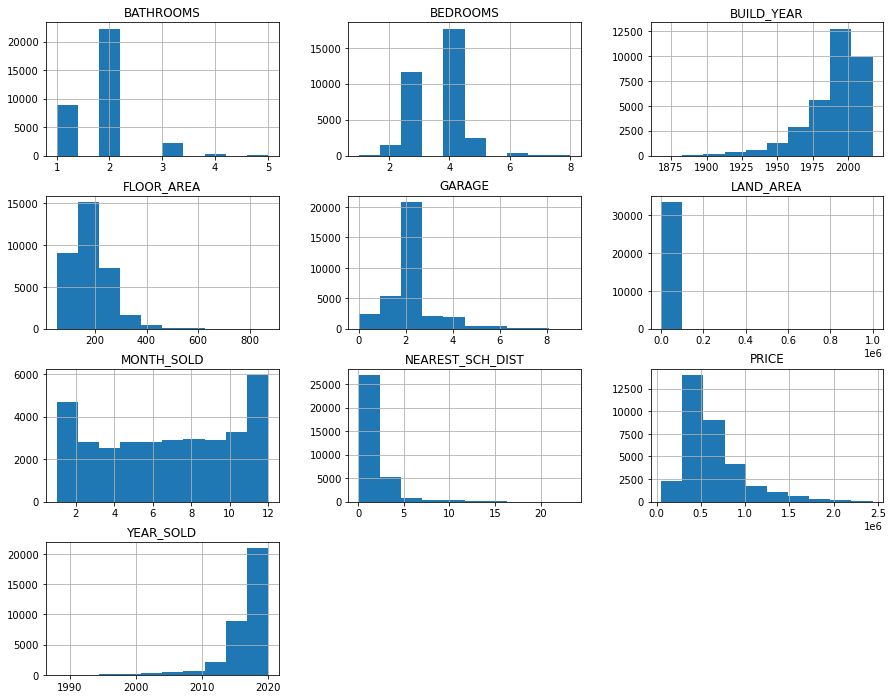

In [543]:
# Show histogram for all columns
perth_houses_cleaned_df.hist(figsize= (15,12))
plt.savefig("images/Cleaned_Histogram.png")

### Data Histograms
Looking through the information that has been retained, we can make the following observations.

* A typical Perth house has 2 bathrooms, 4 bedrooms, is built after 1975 with a floor area of around 200sqm, a double garage and is close to schools.
* A house is sold around the $500,000 mark and most likely to be sold in the summer months.
* The last 5 years has shown strong house sales.

In [544]:
# Confirm there are no null values in the cleaned data
perth_houses_cleaned_df.isnull().sum()

SUBURB              0
PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
BUILD_YEAR          0
NEAREST_STN         0
NEAREST_SCH         0
NEAREST_SCH_DIST    0
MONTH_SOLD          0
YEAR_SOLD           0
dtype: int64

In [545]:
# Confirm the datatypes in the cleaned data
perth_houses_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBURB            33656 non-null  object 
 1   PRICE             33656 non-null  int64  
 2   BEDROOMS          33656 non-null  int32  
 3   BATHROOMS         33656 non-null  int32  
 4   GARAGE            33656 non-null  int32  
 5   LAND_AREA         33656 non-null  int64  
 6   FLOOR_AREA        33656 non-null  int32  
 7   BUILD_YEAR        33656 non-null  int32  
 8   NEAREST_STN       33656 non-null  object 
 9   NEAREST_SCH       33656 non-null  object 
 10  NEAREST_SCH_DIST  33656 non-null  float64
 11  MONTH_SOLD        33656 non-null  int64  
 12  YEAR_SOLD         33656 non-null  int64  
dtypes: float64(1), int32(5), int64(4), object(3)
memory usage: 2.7+ MB


In [546]:
# One-hot encode SUBURB, NEAREST_STN and NEAREST_SCH columns
for column in ['SUBURB','NEAREST_STN','NEAREST_SCH']:
    dummies= pd.get_dummies(perth_houses_cleaned_df[column], prefix= column)
    perth_houses_cleaned_df= pd.concat([perth_houses_cleaned_df, dummies], axis=1)
    perth_houses_cleaned_df= perth_houses_cleaned_df.drop(column, axis=1)

perth_houses_cleaned_df.head()    


,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,NEAREST_SCH_DIST,MONTH_SOLD,YEAR_SOLD,...,NEAREST_SCH_TRINITY COLLEGE,NEAREST_SCH_URSULA FRAYNE CATHOLIC COLLEGE,NEAREST_SCH_WANNEROO SECONDARY COLLEGE,NEAREST_SCH_WARNBRO COMMUNITY HIGH SCHOOL,NEAREST_SCH_WARWICK SENIOR HIGH SCHOOL,NEAREST_SCH_WESLEY COLLEGE,NEAREST_SCH_WILLETTON SENIOR HIGH SCHOOL,NEAREST_SCH_WOODVALE SECONDARY COLLEGE,NEAREST_SCH_YANCHEP SECONDARY COLLEGE,NEAREST_SCH_YOUTH FUTURES COMMUNITY SCHOOL
0,565000,4,2,2,600,160,2003,0.828339,9,2018,...,0,0,0,0,0,0,0,0,0,0
1,365000,3,2,2,351,139,2013,5.524324,2,2019,...,0,0,0,0,0,0,0,0,0,0
2,287000,3,1,1,719,86,1979,1.649178,6,2015,...,0,0,0,0,0,0,0,0,0,0
3,255000,2,1,2,651,59,1953,1.571401,7,2018,...,0,0,0,0,0,0,0,0,0,0
4,325000,4,1,2,466,131,1998,1.514922,11,2016,...,0,0,0,0,0,0,0,0,0,0


### Machine Learning Process

In [547]:
# Separate the y variable, the labels
y = perth_houses_cleaned_df["PRICE"]

# Separate the X variable, the features
X = perth_houses_cleaned_df.drop(columns="PRICE")

In [548]:
# Review the y variable Series
y[:5]

0    565000
1    365000
2    287000
3    255000
4    325000
Name: PRICE, dtype: int64

In [549]:
# Review the X variable DataFrame
X[:5]

,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,NEAREST_SCH_DIST,MONTH_SOLD,YEAR_SOLD,SUBURB_Alexander Heights,...,NEAREST_SCH_TRINITY COLLEGE,NEAREST_SCH_URSULA FRAYNE CATHOLIC COLLEGE,NEAREST_SCH_WANNEROO SECONDARY COLLEGE,NEAREST_SCH_WARNBRO COMMUNITY HIGH SCHOOL,NEAREST_SCH_WARWICK SENIOR HIGH SCHOOL,NEAREST_SCH_WESLEY COLLEGE,NEAREST_SCH_WILLETTON SENIOR HIGH SCHOOL,NEAREST_SCH_WOODVALE SECONDARY COLLEGE,NEAREST_SCH_YANCHEP SECONDARY COLLEGE,NEAREST_SCH_YOUTH FUTURES COMMUNITY SCHOOL
0,4,2,2,600,160,2003,0.828339,9,2018,0,...,0,0,0,0,0,0,0,0,0,0
1,3,2,2,351,139,2013,5.524324,2,2019,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,719,86,1979,1.649178,6,2015,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1,2,651,59,1953,1.571401,7,2018,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,2,466,131,1998,1.514922,11,2016,0,...,0,0,0,0,0,0,0,0,0,0


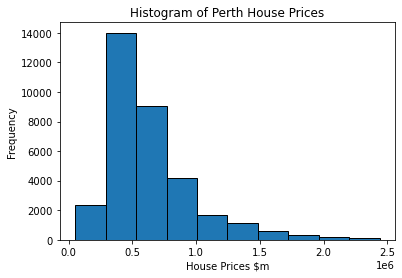

In [550]:
# Create a histogram for the y values
plt.hist(y, bins=10, edgecolor='black')
plt.xlabel('House Prices $m')
plt.ylabel('Frequency')
plt.title('Histogram of Perth House Prices')
plt.savefig("images/Perth_House_Prices_Histogram.png")
plt.show()



### Split Data into Training and Test Datasets

In [551]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.shape   

(25242, 558)

### Create a Linear Regression Model with the Cleaned Data

In [552]:
# Instantiate the Logistic Regression model
linear_regression_model = LinearRegression()

# Fit the model using the training data
linear_regression_model.fit(X_train, y_train)

# Use the Test data to make a prediction
lr_predict = linear_regression_model.predict(X_test)
lr_predict

array([ 358090.0152414 ,  796775.56342577,  543900.10599144, ...,
       1285153.37976829,  437622.43363481, 1009529.50612845])

In [553]:
 # Score the model
print(f"Training Data Score: {linear_regression_model.score(X_train, y_train)}")
print(f"Testing Data Score: {linear_regression_model.score(X_test, y_test)}")

Training Data Score: 0.7839917239500778
Testing Data Score: 0.7730471258452128


In [554]:
# Compute the metrics for the linear regression model
lr_score = linear_regression_model.score(X_test, y_test, sample_weight=None)
r2 = r2_score(y_test, lr_predict)
mse = mean_squared_error(y_test, lr_predict)
rmse = np.sqrt(mse)
std = np.std(y_test)

In [555]:
# Print releveant metrics.
print(f"The score is {lr_score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.7730471258452128.
The r2 is 0.7730471258452128.
The mean squared error is 29509422378.39748.
The root mean squared error is 171783.0677872458.
The standard deviation is 360589.03041634517.


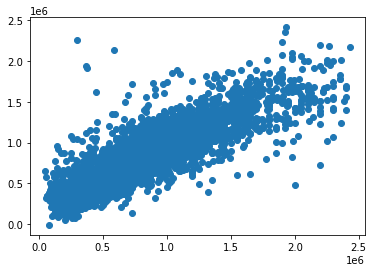

In [556]:
# Create a scatter plot 
plt.scatter(y_test, lr_predict)
plt.savefig("Images/LR_ScatterPlot.png")


### Model 2: Decision Tree Regression Model

In [557]:
# Create Standard Scaler
scaler= StandardScaler()

# Fit Standard Scaler
X_scaler= scaler.fit(X_train)

# Scale Data
X_train_scaled= X_scaler.transform(X_train)
X_test_scaled= X_scaler.transform(X_test)

In [558]:
# Create the Decision Tree Regressor
model= tree.DecisionTreeRegressor(min_samples_split=200, random_state=10)

# Fit the model
model= model.fit(X_train, y_train)

# Make Predictions using the Tree Model
tree_predict= model.predict(X_test)

In [559]:
# Compute the metrics for the Decision Tree model
dt_score = model.score(X_test, y_test, sample_weight=None)
r2 = r2_score(y_test, tree_predict)
mse = mean_squared_error(y_test, tree_predict)
rmse = np.sqrt(mse)
std = np.std(y_test)

In [560]:
# Print releveant metrics.
print(f"The score is {dt_score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.6683314647058829.
The r2 is 0.6683314647058829.
The mean squared error is 43125018504.69333.
The root mean squared error is 207665.64112701293.
The standard deviation is 360589.03041634517.


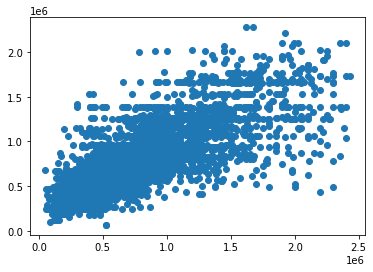

In [561]:
# Create a scatter plot 
plt.scatter(y_test, tree_predict)
plt.savefig("Images/DT_ScatterPlot.png")


### Model 3: Random Forest Regressor Model

In [562]:
# Create a random forest regressor
rf_model = RandomForestRegressor(n_estimators=10, random_state=1)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [563]:
# Compute the metrics for the random forest model
rf_score = rf_model.score(X_test_scaled, y_test, sample_weight=None)
r2 = r2_score(y_test, tree_predict)
mse = mean_squared_error(y_test, tree_predict)
rmse = np.sqrt(mse)
std = np.std(y_test)

In [564]:
# Print releveant metrics.
print(f"The score is {rf_score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.7577739627910041.
The r2 is 0.6683314647058829.
The mean squared error is 43125018504.69333.
The root mean squared error is 207665.64112701293.
The standard deviation is 360589.03041634517.


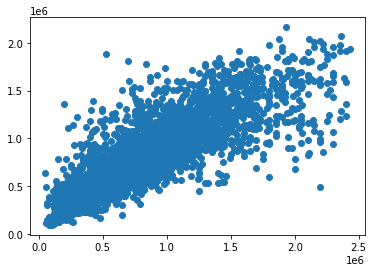

In [565]:
# Create a scatter plot 
plt.scatter(y_test, predictions)
plt.savefig("Images/RF_ScatterPlot.png")

### Compare the 3 model Scores

In [566]:
# Print out the 3 models final scores
print(f"The Linear Regression Model Score is {lr_score}.")
print(f"The Decision Tree Regression Model Score is {dt_score}.")
print(f"The Random Forest Regression Model Score is {rf_score}.")

The Linear Regression Model Score is 0.7730471258452128.
The Decision Tree Regression Model Score is 0.6683314647058829.
The Random Forest Regression Model Score is 0.7577739627910041.


### Summary 

Of the 3 Regression Models used the Linear Regression Model was the best performer with a score of 77.30%.<br>

While this is an acceptable score some further training would be required in to order to hopefully reach a better result.<br>
This could be achieved by taking a deeper look into the original data to ensure that the dataset is clean, free of outliers, and contains sufficient instances for training. Gathering more data, if feasible, can also enhance the model's performance.<br>
Also look at experimenting with the parameters of both the Decision Tree Model and the Random Forest Model.